In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import time
from selenium import webdriver
import seaborn as sns
import numpy as np
import matplotlib.cm as cm 

!pip install selenium
!apt-get update
!apt install chromium-chromedriver

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

You should consider upgrading via the '/Users/apple/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
zsh:1: command not found: apt-get
The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.



SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 99
Current browser version is 101.0.4951.64 with binary path /Applications/Google Chrome.app/Contents/MacOS/Google Chrome
Stacktrace:
0   chromedriver                        0x0000000105343159 chromedriver + 5120345
1   chromedriver                        0x00000001052d0b13 chromedriver + 4651795
2   chromedriver                        0x0000000104ec0e68 chromedriver + 392808
3   chromedriver                        0x0000000104ee71e6 chromedriver + 549350
4   chromedriver                        0x0000000104ee2c72 chromedriver + 531570
5   chromedriver                        0x0000000104edf6ed chromedriver + 517869
6   chromedriver                        0x0000000104f19825 chromedriver + 755749
7   chromedriver                        0x0000000104f13a33 chromedriver + 731699
8   chromedriver                        0x0000000104ee95dd chromedriver + 558557
9   chromedriver                        0x0000000104eea4f5 chromedriver + 562421
10  chromedriver                        0x000000010530038d chromedriver + 4846477
11  chromedriver                        0x000000010531a21c chromedriver + 4952604
12  chromedriver                        0x000000010531fa12 chromedriver + 4975122
13  chromedriver                        0x000000010531ab4a chromedriver + 4954954
14  chromedriver                        0x00000001052f55b0 chromedriver + 4801968
15  chromedriver                        0x0000000105334f78 chromedriver + 5062520
16  chromedriver                        0x00000001053350ff chromedriver + 5062911
17  chromedriver                        0x000000010534a545 chromedriver + 5150021
18  libsystem_pthread.dylib             0x00007ff80d2854e1 _pthread_start + 125
19  libsystem_pthread.dylib             0x00007ff80d280f6b thread_start + 15


In [26]:
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
url = 'http://buking.kr/rank.php?m=mg&st=md&gi=1&si=%EC%84%9C%EC%9A%B8'
html = requests.get(url)
bs = BeautifulSoup(html.content, "html.parser")
location = bs.find("td", {'class' : "td2 ilink"})
money = bs.find("td", {'class' : "td2rp"})

In [3]:
type(money)
type(location)

bs4.element.Tag

In [4]:
location = str(location).split('>')

In [5]:
location[6].split('<')[0]

'4974'

In [11]:
cnt = 2
result = {}
for i in location :
    key = location[cnt].split('<')[0][3:]
    result[key] = [int(location[cnt+4].split('<')[0])]
    if(location[cnt].split('<')[0][3:]) == '도봉구' : break
    cnt += 18

In [12]:
result

{'강남구': [4974],
 '서초구': [4687],
 '용산구': [4002],
 '성동구': [3839],
 '송파구': [3545],
 '마포구': [3290],
 '광진구': [3248],
 '동작구': [3033],
 '영등포구': [2969],
 '양천구': [2897],
 '중구': [2738],
 '강동구': [2738],
 '종로구': [2733],
 '서대문구': [2602],
 '성북구': [2437],
 '동대문구': [2384],
 '강서구': [2332],
 '노원구': [2154],
 '관악구': [2137],
 '은평구': [2036],
 '구로구': [1953],
 '강북구': [1952],
 '중랑구': [1938],
 '금천구': [1871],
 '도봉구': [1728]}

In [13]:
data = pd.read_csv('data/2020서울특별시_합계출산율.csv', encoding='cp949')
data = data.drop(0)
data = data.loc[:, ['시군구별', '합계출산율']]
data.columns = ['자치구', '합계출산율']
data

,자치구,합계출산율
1,종로구,0.522
2,중구,0.688
3,용산구,0.634
4,성동구,0.783
5,광진구,0.527
6,동대문구,0.699
7,중랑구,0.660
8,성북구,0.676
9,강북구,0.550
10,도봉구,0.601


In [14]:
data['합계출산율'][1]
cnt = 2
data['합계출산율'][cnt]

0.688

In [15]:
cnt = 1
for key in data['자치구'] : 
    for key2 in result.keys() :
        if(key == key2) :
            result[key].append(data['합계출산율'][cnt])
            break
    cnt+=1

In [16]:
result

{'강남구': [4974, 0.537],
 '서초구': [4687, 0.656],
 '용산구': [4002, 0.634],
 '성동구': [3839, 0.783],
 '송파구': [3545, 0.665],
 '마포구': [3290, 0.594],
 '광진구': [3248, 0.527],
 '동작구': [3033, 0.655],
 '영등포구': [2969, 0.705],
 '양천구': [2897, 0.644],
 '중구': [2738, 0.688],
 '강동구': [2738, 0.748],
 '종로구': [2733, 0.522],
 '서대문구': [2602, 0.685],
 '성북구': [2437, 0.676],
 '동대문구': [2384, 0.699],
 '강서구': [2332, 0.675],
 '노원구': [2154, 0.695],
 '관악구': [2137, 0.474],
 '은평구': [2036, 0.623],
 '구로구': [1953, 0.737],
 '강북구': [1952, 0.55],
 '중랑구': [1938, 0.66],
 '금천구': [1871, 0.668],
 '도봉구': [1728, 0.601]}

In [21]:
df = pd.DataFrame(result, index = ['평당 단가', '합계 출산율']).transpose()

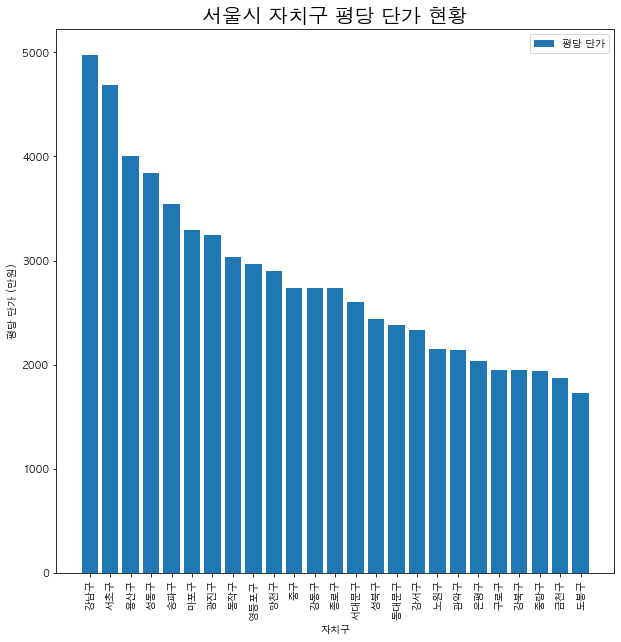

In [86]:
fig, ax = plt.subplots(figsize=(10,10))
file_name = '서울시 자치구 평당 단가 현황'

ax = plt.bar(df.index, df['평당 단가'], label = '평당 단가')
plt.xticks(rotation = 90)

plt.xlabel('자치구')
plt.ylabel('평당 단가 (만원)')
plt.title(file_name, size = 20)
plt.legend()
plt.savefig('result/' + file_name  +'.png')
plt.show();

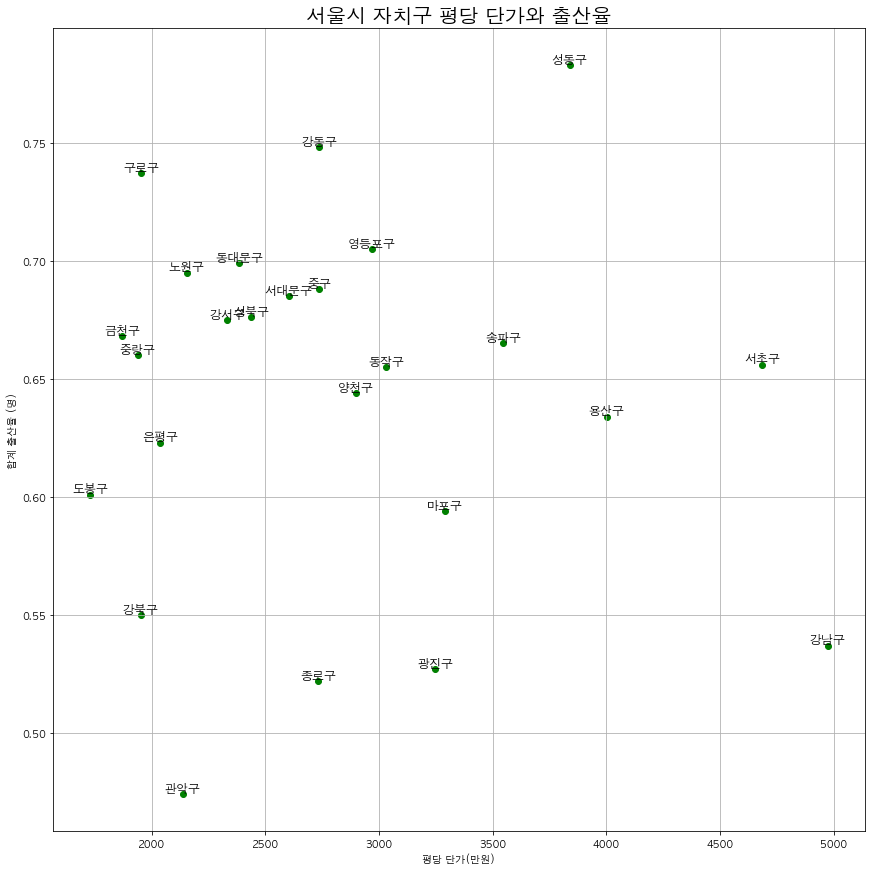

In [89]:
y = list(df['평당 단가'])
x = list(df['합계 출산율'])
fig, ax = plt.subplots(figsize=(12,12))

file_name = '서울시 자치구 평당 단가와 출산율'
plt.title(file_name, fontsize=20)

plt.scatter(df['평당 단가'], df['합계 출산율'], color='green')

for i, label in enumerate(df.index):
    plt.text(y[i], x[i], label,horizontalalignment='center',  
             verticalalignment='bottom', fontsize=12)

plt.grid()
plt.tight_layout()
plt.ylabel('합계 출산율 (명)')
plt.xlabel('평당 단가(만원)')
plt.savefig('result/'+file_name + '.png')
plt.show()